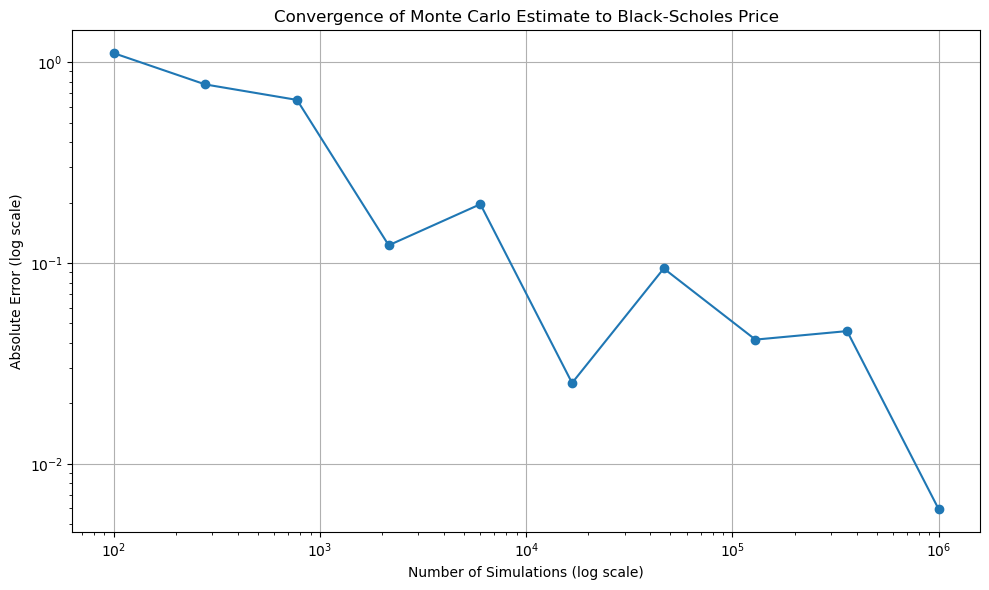

In [2]:
import sys
import os

# Bu hücreyi çalıştırdığın dosya /notebooks klasöründeyse, bir üst dizini eklemeliyiz
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import numpy as np
import matplotlib.pyplot as plt
from core.monte_carlo_basic import monte_carlo_option_pricing
from core.black_scholes import black_scholes_call

S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
true_value = black_scholes_call(S0, K, T, r, sigma)

sim_counts = np.logspace(2, 6, 10, dtype=int)  # 100 to 1,000,000
errors = []

for n in sim_counts:
    price = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations=n, option_type='call')
    error = abs(price - true_value)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(sim_counts, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title("Convergence of Monte Carlo Estimate to Black-Scholes Price")
plt.xlabel("Number of Simulations (log scale)")
plt.ylabel("Absolute Error (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()
